In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/CodeBotixMaster_finalll.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               870 non-null    object 
 1   gender             872 non-null    object 
 2   class              605 non-null    object 
 3   mode               872 non-null    object 
 4   workshop_name      872 non-null    object 
 5   workshop_duration  872 non-null    object 
 6   interest_before    265 non-null    float64
 7   interest_after     241 non-null    float64
 8   highlights         20 non-null     object 
 9   suggestions        89 non-null     object 
 10  satisfaction       474 non-null    float64
 11  expectations       364 non-null    object 
 12  prior_experience   398 non-null    float64
 13  knowledge_gain     419 non-null    float64
dtypes: float64(5), object(9)
memory usage: 95.5+ KB


In [ ]:
df.head()

,name,gender,class,mode,workshop_name,workshop_duration,interest_before,interest_after,highlights,suggestions,satisfaction,expectations,prior_experience,knowledge_gain
0,Akshita Edith,female,10th,Online,1 hour Online intro to Robotics workshop-pilot,1 hour,0.928610,NaN,NaN,NaN,NaN,To learn new things,0.900789,NaN
1,Gladys B,male,10th,Online,1 hour Online intro to Robotics workshop-pilot,1 hour,0.934968,NaN,NaN,NaN,NaN,Learning something that might help me in the f...,0.885160,NaN
2,R.p manirathan,male,12th,Online,1 hour Online intro to Robotics workshop-pilot,1 hour,0.665015,NaN,NaN,NaN,NaN,Gaining Knowledge about robotics,0.804458,NaN
3,Adithiyan VR,male,12th,Online,1 hour Online intro to Robotics workshop-pilot,1 hour,0.938846,NaN,NaN,NaN,NaN,Quality of teaching and Projects,0.551138,NaN
4,Diya.K.Sreejith,female,6th,Online,1 hour Online intro to Robotics workshop-pilot,1 hour,0.847706,NaN,NaN,NaN,NaN,Interest,0.760386,NaN


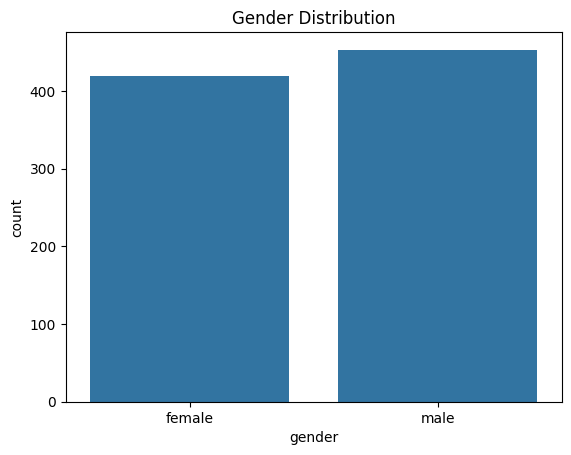

In [ ]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


In [ ]:
df['gender'].value_counts()

,count
gender,
male,453
female,419


In [ ]:
def categorize_interest(x):
    if pd.isna(x):
        return np.nan
    elif x < 0.36:
        return 'low'
    elif 0.36 <= x <= 0.82:
        return 'medium'
    else:
        return 'high'

def categorize_prior_experience(x):
    if pd.isna(x):
        return np.nan
    elif x < 0.2:
        return 'low'
    elif 0.2 <= x <= 0.45:
        return 'medium'
    else:
        return 'high'

def categorize_knowledge_gain(x):
    if pd.isna(x):
        return np.nan
    elif x < 0.95:
        return 'low'
    elif 0.95 <= x <= 0.99:
        return 'medium'
    else:
        return 'high'

def categorize_satisfaction(x):
    if pd.isna(x):
        return np.nan
    elif x < 0.6:
        return 'low'
    elif 0.6 <= x <= 0.75:
        return 'medium'
    else:
        return 'high'

# Apply categories
df['interest_before_cat'] = df['interest_before'].apply(categorize_interest)
df['interest_after_cat'] = df['interest_after'].apply(categorize_interest)
df['prior_experience_cat'] = df['prior_experience'].apply(categorize_prior_experience)
df['knowledge_gain_cat'] = df['knowledge_gain'].apply(categorize_knowledge_gain)
df['satisfaction_cat'] = df['satisfaction'].apply(categorize_satisfaction)


df['interest_gain'] = df['interest_after'] - df['interest_before']


interest_gain_threshold = 0.1
df['interest_improved'] = np.where(df['interest_gain'] > interest_gain_threshold, 'improved', 'not_improved')

In [ ]:
print("Interest Before Categories:\n", df['interest_before_cat'].value_counts(dropna=True))
print("Interest After Categories:\n", df['interest_after_cat'].value_counts(dropna=True))
print("Prior Experience Categories:\n", df['prior_experience_cat'].value_counts(dropna=True))
print("Knowledge Gain Categories:\n", df['knowledge_gain_cat'].value_counts(dropna=True))
print("Satisfaction Categories:\n", df['satisfaction_cat'].value_counts(dropna=True))
print("Interest Improvement:\n", df['interest_improved'].value_counts(dropna=True))

Interest Before Categories:
 interest_before_cat
medium    147
low        61
high       57
Name: count, dtype: int64
Interest After Categories:
 interest_after_cat
high      206
low        20
medium     15
Name: count, dtype: int64
Prior Experience Categories:
 prior_experience_cat
medium    198
low       101
high       99
Name: count, dtype: int64
Knowledge Gain Categories:
 knowledge_gain_cat
high      241
medium     97
low        81
Name: count, dtype: int64
Satisfaction Categories:
 satisfaction_cat
medium    296
low       113
high       65
Name: count, dtype: int64
Interest Improvement:
 interest_improved
not_improved    747
improved        125
Name: count, dtype: int64


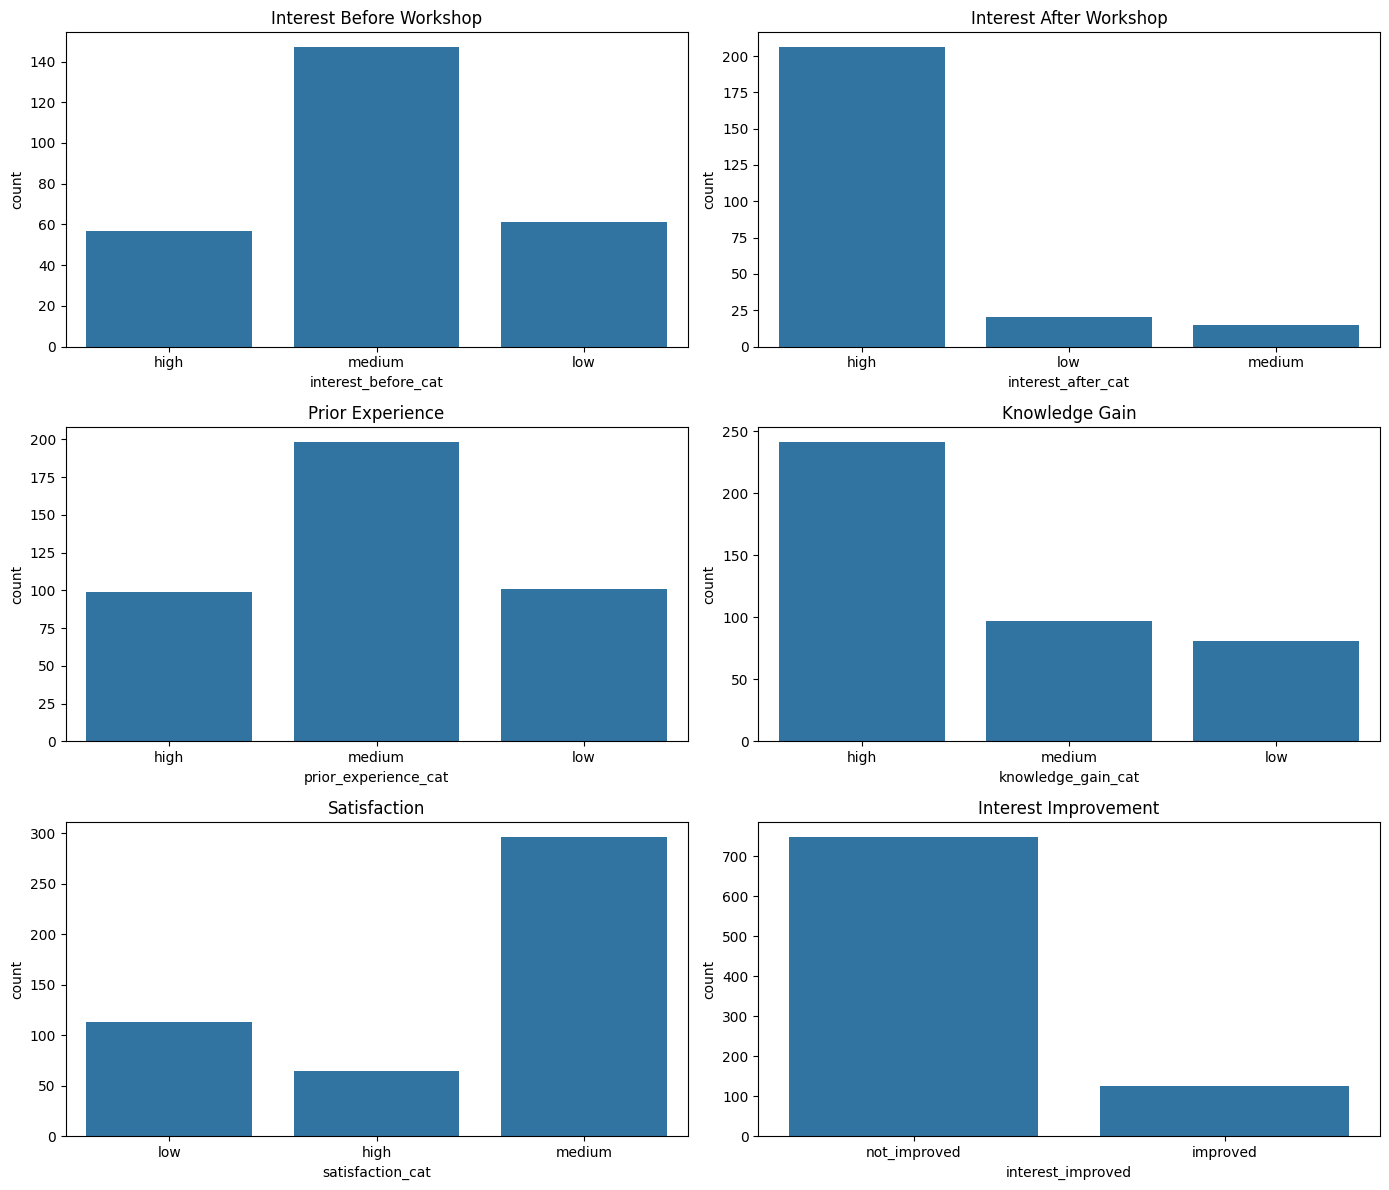

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
sns.countplot(data=df, x='interest_before_cat', ax=axs[0,0])
axs[0,0].set_title('Interest Before Workshop')
sns.countplot(data=df, x='interest_after_cat', ax=axs[0,1])
axs[0,1].set_title('Interest After Workshop')
sns.countplot(data=df, x='prior_experience_cat', ax=axs[1,0])
axs[1,0].set_title('Prior Experience')
sns.countplot(data=df, x='knowledge_gain_cat', ax=axs[1,1])
axs[1,1].set_title('Knowledge Gain')
sns.countplot(data=df, x='satisfaction_cat', ax=axs[2,0])
axs[2,0].set_title('Satisfaction')
sns.countplot(data=df, x='interest_improved', ax=axs[2,1])
axs[2,1].set_title('Interest Improvement')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = ['interest_before', 'interest_after', 'prior_experience', 'knowledge_gain', 'satisfaction', 'interest_gain']
print("Correlation matrix:\n", df[numeric_cols].corr())

Correlation matrix:
                   interest_before  interest_after  prior_experience  \
interest_before          1.000000       -0.042270          0.494812   
interest_after          -0.042270        1.000000         -0.279759   
prior_experience         0.494812       -0.279759          1.000000   
knowledge_gain           0.059346        0.119730               NaN   
satisfaction            -0.139645       -0.022817               NaN   
interest_gain           -0.766246        0.674362         -0.032653   

                  knowledge_gain  satisfaction  interest_gain  
interest_before         0.059346     -0.139645      -0.766246  
interest_after          0.119730     -0.022817       0.674362  
prior_experience             NaN           NaN      -0.032653  
knowledge_gain          1.000000     -0.009679       0.046044  
satisfaction           -0.009679      1.000000      -0.004798  
interest_gain           0.046044     -0.004798       1.000000  


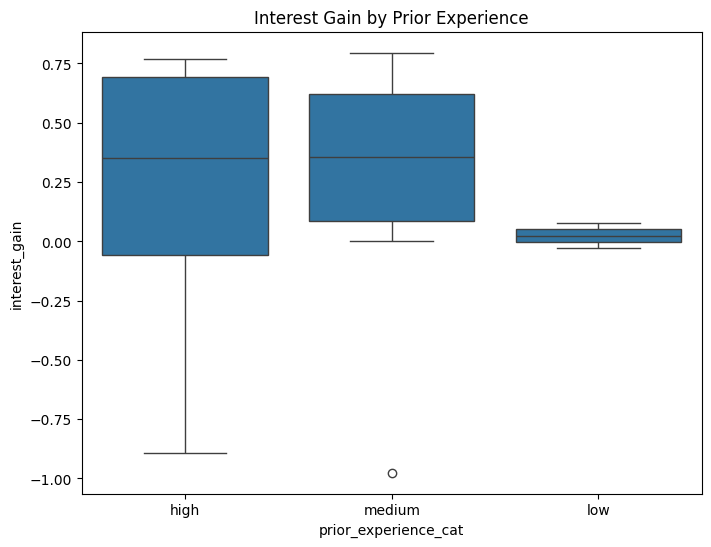

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='prior_experience_cat', y='interest_gain', data=df)
plt.title('Interest Gain by Prior Experience')
plt.show()


In [ ]:
improved = df[df['interest_improved']=='improved']
not_improved = df[df['interest_improved']=='not_improved']


In [ ]:
print("Mean knowledge gain for improved group:", improved['knowledge_gain'].mean())
print("Mean knowledge gain for not improved group:", not_improved['knowledge_gain'].mean())

Mean knowledge gain for improved group: 0.9897427722760491
Mean knowledge gain for not improved group: 0.9728693456843774


In [ ]:
# Factors associated with improvement (distribution of satisfaction and prior experience categories by improvement)
print("Satisfaction distribution by improvement:")
print(df.groupby('interest_improved')['satisfaction_cat'].value_counts(normalize=True))
print("Prior Experience distribution by improvement:")
print(df.groupby('interest_improved')['prior_experience_cat'].value_counts(normalize=True))

Satisfaction distribution by improvement:
interest_improved  satisfaction_cat
improved           medium              0.716981
                   low                 0.226415
                   high                0.056604
not_improved       medium              0.597826
                   low                 0.241848
                   high                0.160326
Name: proportion, dtype: float64
Prior Experience distribution by improvement:
interest_improved  prior_experience_cat
improved           medium                  0.789474
                   high                    0.210526
not_improved       medium                  0.482850
                   low                     0.266491
                   high                    0.250660
Name: proportion, dtype: float64


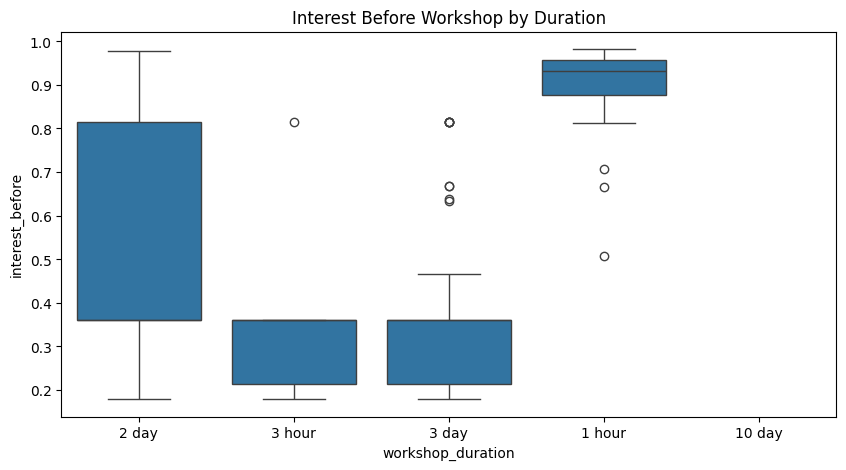

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='workshop_duration', y='interest_before', data=df, order=df['workshop_duration'].value_counts().index)
plt.title('Interest Before Workshop by Duration')
plt.show()

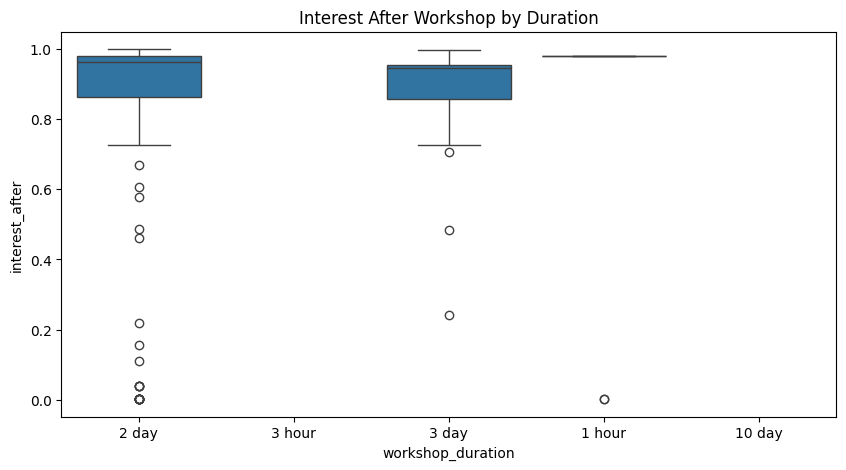

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='workshop_duration', y='interest_after', data=df, order=df['workshop_duration'].value_counts().index)
plt.title('Interest After Workshop by Duration')
plt.show()

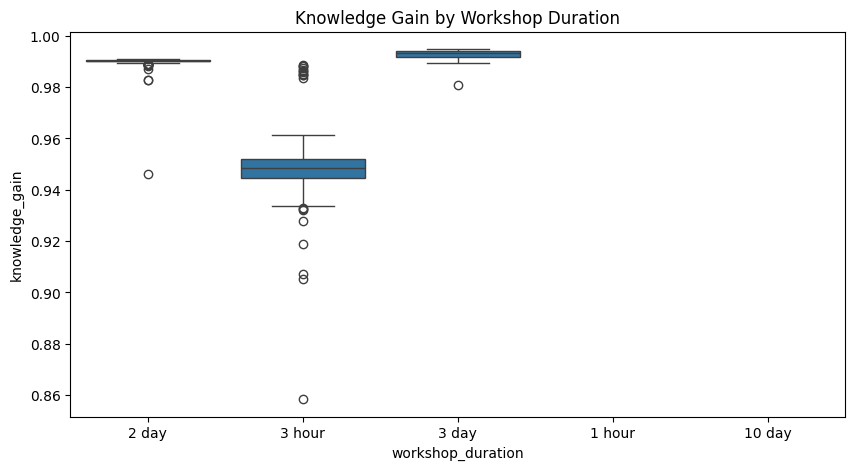

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='workshop_duration', y='knowledge_gain', data=df, order=df['workshop_duration'].value_counts().index)
plt.title('Knowledge Gain by Workshop Duration')
plt.show()

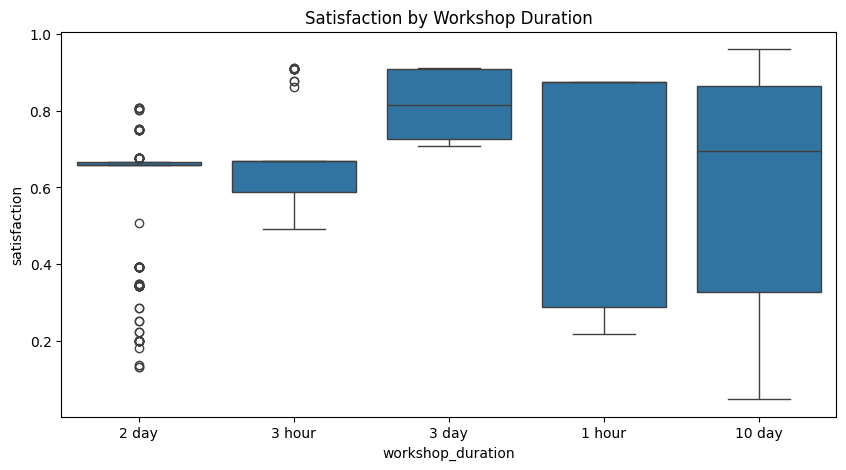

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='workshop_duration', y='satisfaction', data=df, order=df['workshop_duration'].value_counts().index)
plt.title('Satisfaction by Workshop Duration')
plt.show()


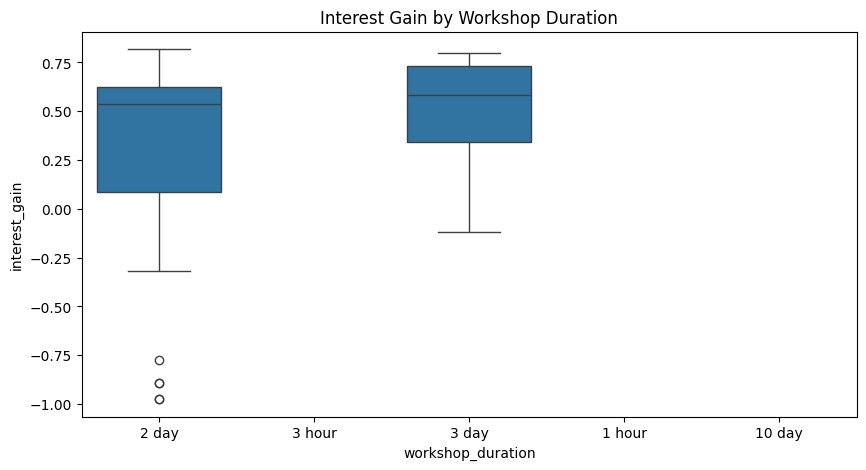

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='workshop_duration', y='interest_gain', data=df, order=df['workshop_duration'].value_counts().index)
plt.title('Interest Gain by Workshop Duration')
plt.show()

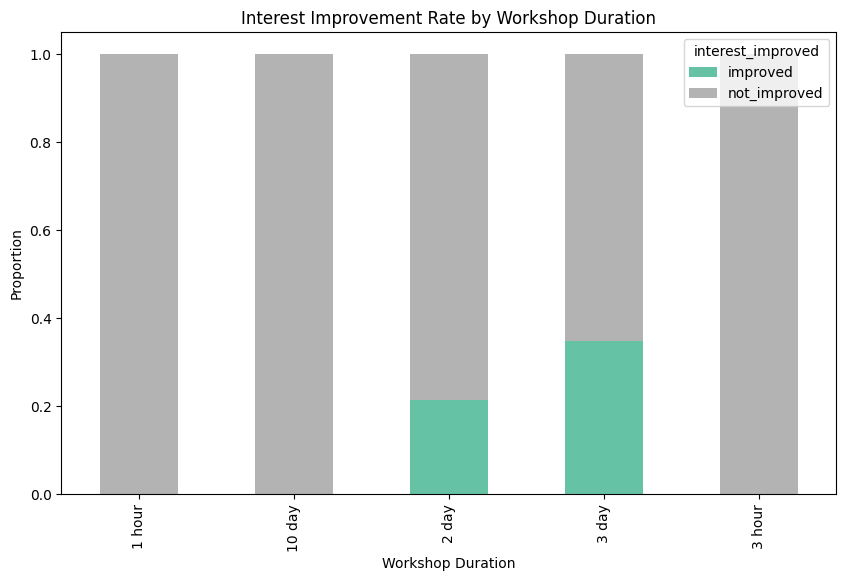

In [ ]:
improvement_counts = df.groupby(['workshop_duration', 'interest_improved']).size().unstack(fill_value=0)
improvement_rate = improvement_counts.div(improvement_counts.sum(axis=1), axis=0)

improvement_rate.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Interest Improvement Rate by Workshop Duration')
plt.ylabel('Proportion')
plt.xlabel('Workshop Duration')
plt.show()
